# Test set evaluation of Gender image classification models

## UTKFace dataset

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2]:
from keras import backend as K
K.clear_session()

In [3]:
# UTKFace image directories (unsorted and sorted)
TEST_DIR = 'UTKFace/'
TEST_SORT_DIR = 'UTKFace sorted/'

In [4]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in os.listdir(TEST_DIR):
    image_path = os.path.join(TEST_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [5]:
# Move UTKFace images into unique directories based on their gender label
# Need only to run once to organize
# m_dir = 'UTKFace sorted/male'
# f_dir = 'UTKFace sorted/female'

# import shutil

# for filename in os.listdir(TEST_DIR):
#     image_path = os.path.join(TEST_DIR, filename)
#     temp = filename.split('_')
#     gender = int(temp[1])
#     if gender == 0:                                # Move to Male folder
#         new_path = os.path.join(m_dir, filename)
#         shutil.move(image_path, new_path)
#     elif gender == 1:                              # Move to Female folder
#         new_path = os.path.join(f_dir, filename)
#         shutil.move(image_path, new_path)

## Load images

### a. ImageDataGenerator
### image_size = (224, 224)

In [6]:
# image_size = (224, 224)
# batch_size = 23708

# datagen_transform = ImageDataGenerator(
#     rescale =1./255,
#     validation_split=.2,
#     rotation_range=20,
#     width_shift_range=.2,
#     height_shift_range=.2,
#     shear_range=.2,
#     zoom_range=.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# datagen_val = ImageDataGenerator(
#     rescale = 1./255,
# )

# a_test_ds_rgb = datagen_transform.flow_from_directory(
#     TEST_SORT_DIR,
#     seed=123,
#     target_size=image_size,
#     batch_size=batch_size,
#     classes=['female','male'],
#     class_mode="binary",
#     color_mode="rgb"
# )

# a_test_ds_gs = datagen_transform.flow_from_directory(
#     TEST_SORT_DIR,
#     seed=123,
#     target_size=image_size,
#     batch_size=batch_size,
#     classes=['female','male'],
#     class_mode="binary",
#     color_mode="grayscale"
# )

Found 23708 images belonging to 2 classes.
Found 23708 images belonging to 2 classes.


In [8]:
#x, a_test_labels = a_test_ds_gs.next()
# a_test_labels = a_test_labels.astype(int)

### b. image_dataset_from_directory
### image_size = (224, 224)

In [5]:
# Grayscale test set images
test_ds_gs = tf.keras.utils.image_dataset_from_directory(TEST_SORT_DIR, 
                                                         seed=123, 
                                                         batch_size=128,
                                                         image_size=(224, 224),
                                                         color_mode="grayscale")
# RGB test set images
test_ds_rgb = tf.keras.utils.image_dataset_from_directory(TEST_SORT_DIR, 
                                                         seed=123, 
                                                         batch_size=128,
                                                         image_size=(224, 224),
                                                         color_mode="rgb")

Found 23708 files belonging to 2 classes.
Found 23708 files belonging to 2 classes.


In [10]:
# labels are the same for both GS and RGB image datasets, so only need 1 label object
test_labels = np.concatenate([y for x, y in test_ds_gs], axis=0)

In [11]:
# Prediction function
def reload_predict(model, dataset, labels):
    # Reload model from saved .h5 files
    model.summary()
    test_labels = labels
    test_ds = dataset
    # make predictions on test set images
    test_predictions = model.predict(test_ds)
    # Evaluate the model
    test_predictions_rounded_labels=np.argmax(test_predictions, axis=1)
    print(classification_report(test_labels, test_predictions_rounded_labels))
    cm = confusion_matrix(test_labels, test_predictions_rounded_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print(round(accuracy_score(test_labels, test_predictions_rounded_labels),4))

## Evaluate models

### VGG-16 Model 1a-gs: Grayscale + Frozen Layers

In [12]:
M1a_gs = keras.models.load_model("GC weights/Frozen/mod1a-gs/mod1a_gs_frozen.h5")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,576
Trainable params: 2,032
Non-trainable params: 138,357,544
_________________________________________________________________
186/186 [==============================] - 33s 138ms/step
              precision    recall  f1-score   support

           0       0.48      0.33      0.40     11317
        

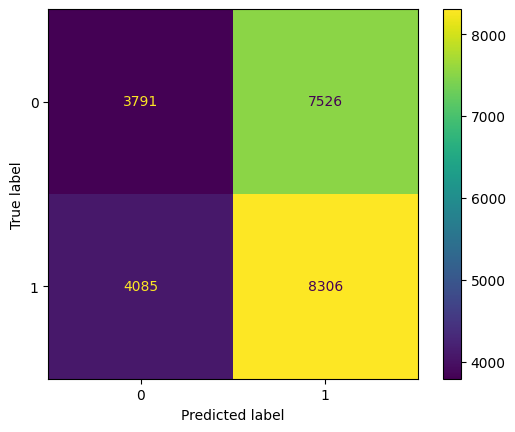

0.5102


In [13]:
reload_predict(M1a_gs, test_ds_gs, test_labels)

### VGG-16 Model 1b-gs: Grayscale + Frozen layers

In [14]:
# Recreate model instance
M1b_gs = keras.models.load_model('GC weights/Frozen/mod1b-gs/mod1b_gs_frozen.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,576
Trainable params: 2,032
Non-trainable params: 138,357,544
_________________________________________________________________
186/186 [==============================] - 25s 134ms/step
              precision    recall  f1-score   support

           0       0.48      0.38      0.42     11317
        

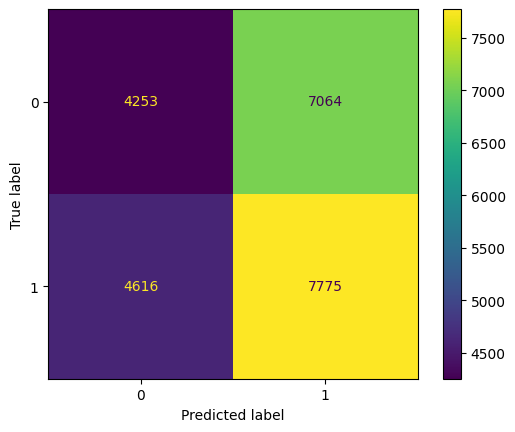

0.5073


In [15]:
reload_predict(M1b_gs, test_ds_gs, test_labels)

### VGG-16 Model 1a-RGB: RGB + Frozen layers

In [16]:
M1a_rgb = keras.models.load_model('GC weights/Frozen/mod1a-RGB/mod1a_RGB_frozen.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________
186/186 [==============================] - 28s 149ms/step
              precision    recall  f1-score   support

           0       0.48      0.58      0.52     11317
           1       0.52      0.42      0.47     12391

    accuracy                           0.50     23708
   macro avg       0.50      0.

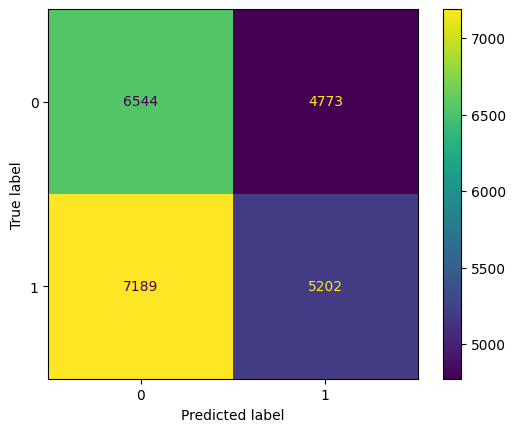

0.4954


In [17]:
reload_predict(M1a_rgb, test_ds_rgb, test_labels)

### VGG-16 Model 1b-RGB: RGB + Frozen layers

In [18]:
# Recreate model instance
M1b_rgb = keras.models.load_model('GC weights/Frozen/mod1b-RGB/mod1b_RGB_frozen.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________
186/186 [==============================] - 28s 150ms/step
              precision    recall  f1-score   support

           0       0.47      0.43      0.45     11317
           1       0.52      0.57      0.54     12391

    accuracy                           0.50     23708
   macro avg       0.50      0.

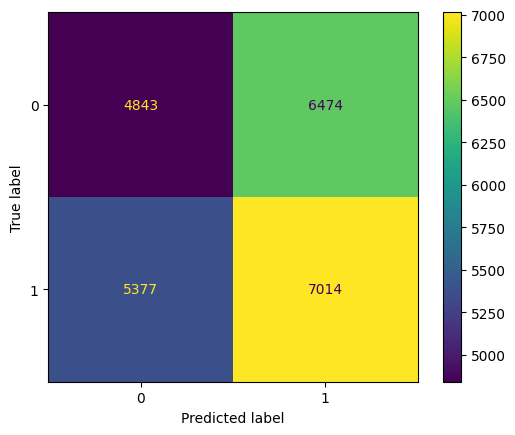

0.5001


In [19]:
reload_predict(M1b_rgb, test_ds_rgb, test_labels)

### Basic CNN Model 2a-RGB: RGB + No frozen Layers

In [20]:
# Recreate model instance
M2a_rgb = keras.models.load_model('GC weights/Unfrozen/mod2a-RGB/mod2a_RGB.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  896         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                              

                                                                                                  
 separable_conv2d_5 (SeparableC  (None, 28, 28, 512)  267264     ['activation_7[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 28, 28, 512)  2048       ['separable_conv2d_5[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 512)  0          ['batch_normalization_7[0][0]']  
                                                                                                  
 conv2d_4 (Conv2D)              (None, 14, 14, 512)  131584      ['add_1[0][0]']                  
          

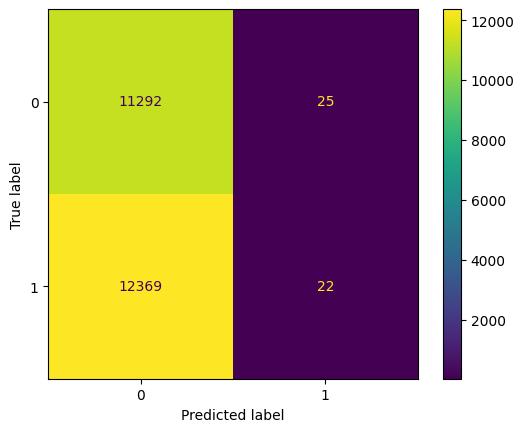

0.4772


In [21]:
reload_predict(M2a_rgb, test_ds_rgb, test_labels)

### Basic CNN Model 2b-RGB: RGB + No frozen Layers

In [22]:
# Recreate model instance
M2b_rgb = keras.models.load_model('GC weights/Unfrozen/mod2b-RGB/mod2b_RGB.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 32  896         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                              

                                                                                                  
 separable_conv2d_5 (SeparableC  (None, 28, 28, 512)  267264     ['activation_7[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 28, 28, 512)  2048       ['separable_conv2d_5[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 512)  0          ['batch_normalization_7[0][0]']  
                                                                                                  
 conv2d_4 (Conv2D)              (None, 14, 14, 512)  131584      ['add_1[0][0]']                  
          

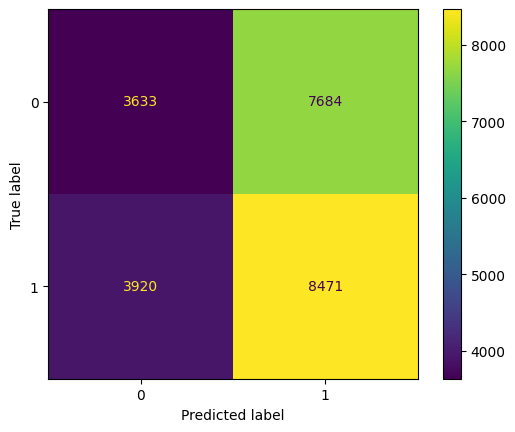

0.5105


In [23]:
reload_predict(M2b_rgb, test_ds_rgb, test_labels)

### Basic CNN Model 2a-gs: Grayscale + No frozen Layers

### Basic CNN Model 2b-gs: Grayscale + No frozen Layers

In [24]:
# Recreate model instance
M2b_gs = keras.models.load_model('GC weights/Unfrozen/mod2b-gs/mod2b_gs.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 3)  30          ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 112, 112, 32  896         ['conv2d[0][0]']                 
                                )                                                                 
                                                                                              

                                                                                                  
 separable_conv2d_5 (SeparableC  (None, 28, 28, 512)  267264     ['activation_7[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 28, 28, 512)  2048       ['separable_conv2d_5[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 512)  0          ['batch_normalization_7[0][0]']  
                                                                                                  
 conv2d_5 (Conv2D)              (None, 14, 14, 512)  131584      ['add_1[0][0]']                  
          

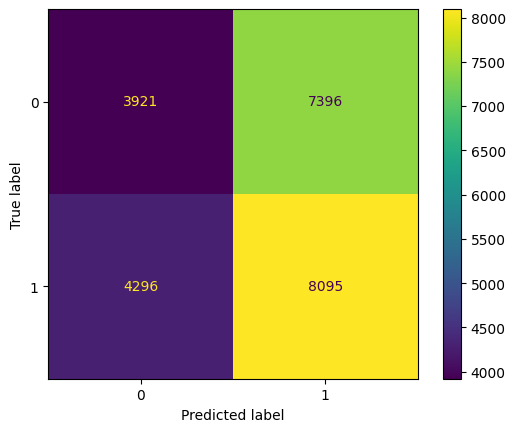

0.5068


In [25]:
reload_predict(M2b_gs, test_ds_gs, test_labels)

### DenseNet201 Model 3a-RGB: RGB + Frozen Layers

### DenseNet201 Model 3b-RGB: RGB + Frozen Layers

In [26]:
# Recreate model instance
M3b_rgb = keras.models.load_model('GC weights/Frozen/mod3b-RGB/mod3b_RGB_frozen.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 1000)              20242984  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 20,244,986
Trainable params: 2,002
Non-trainable params: 20,242,984
_________________________________________________________________
186/186 [==============================] - 41s 208ms/step
              precision    recall  f1-score   support

           0       0.48      0.30      0.37     11317
           1       0.52      0.70      0.60     12391

    accuracy                           0.51     23708
   macro avg       0.50      0.50

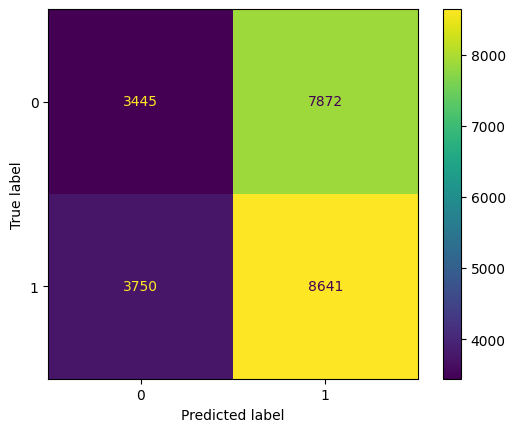

0.5098


In [27]:
reload_predict(M3b_rgb, test_ds_rgb, test_labels)

### DenseNet201 Model 3a-gs: Grayscale + Frozen Layers

### DenseNet201 Model 3b-gs: Grayscale + Frozen Layers

In [28]:
# Recreate model instance
M3b_gs = keras.models.load_model('GC weights/Frozen/mod3b-gs/mod3b_gs_frozen.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 densenet201 (Functional)    (None, 1000)              20242984  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 20,245,016
Trainable params: 2,032
Non-trainable params: 20,242,984
_________________________________________________________________
186/186 [==============================] - 38s 193ms/step
              precision    recall  f1-score   support

           0       0.47      0.15      0.23     11317
          

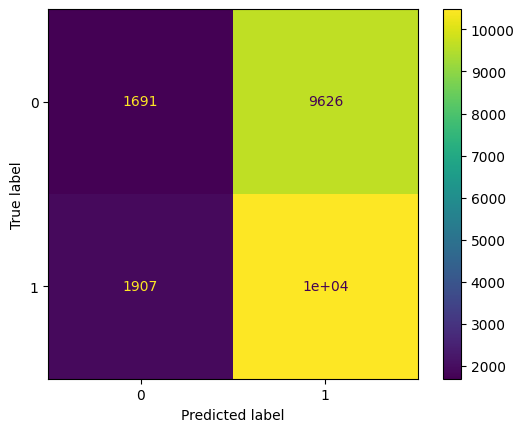

0.5135


In [29]:
reload_predict(M3b_gs, test_ds_gs, test_labels)